# Krakow fligths

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
krk_airlines = pd.read_csv('krk-airlines.csv')
krk_airlines

,airlineid,airline,airplane
0,PE,PanEurope,Boeing 787
1,SH,SunHoliday,Airbus A319
2,BS,BlueSky,Airbus A330


In [3]:
krk_flights = pd.read_csv('krk-flights.csv')
krk_flights

,flight,from,to,airlineid
0,LN222,Krakow,London,PE
1,BE321,Krakow,Berlin,SH
2,PA006,Krakow,Paris,SH
3,NY777,Krakow,New York,BS


In [4]:
krk_passengers = pd.read_csv('krk-passengers.csv')
krk_passengers

,flight,name,surname,gender
0,NY777,Ingaberg,Adanet,Female
1,PA006,Korry,McGrann,Female
2,NY777,Leonhard,Videneev,Male
3,PA006,Heath,Butterfill,Female
4,LN222,Ferguson,Osban,Male
...,...,...,...,...
95,PA006,Alon,Brixham,Male
96,BE321,Roman,MacAskill,Male
97,LN222,Emmanuel,Tickel,Male
98,LN222,Ingmar,Cockman,Male


In [6]:
flights_airlines = pd.merge(krk_flights, krk_airlines, on="airlineid")
flights_airlines

,flight,from,to,airlineid,airline,airplane
0,LN222,Krakow,London,PE,PanEurope,Boeing 787
1,BE321,Krakow,Berlin,SH,SunHoliday,Airbus A319
2,PA006,Krakow,Paris,SH,SunHoliday,Airbus A319
3,NY777,Krakow,New York,BS,BlueSky,Airbus A330


In [7]:
krk_all = pd.merge(krk_passengers, flights_airlines, on="flight")
krk_all

,flight,name,surname,gender,from,to,airlineid,airline,airplane
0,NY777,Ingaberg,Adanet,Female,Krakow,New York,BS,BlueSky,Airbus A330
1,PA006,Korry,McGrann,Female,Krakow,Paris,SH,SunHoliday,Airbus A319
2,NY777,Leonhard,Videneev,Male,Krakow,New York,BS,BlueSky,Airbus A330
3,PA006,Heath,Butterfill,Female,Krakow,Paris,SH,SunHoliday,Airbus A319
4,LN222,Ferguson,Osban,Male,Krakow,London,PE,PanEurope,Boeing 787
...,...,...,...,...,...,...,...,...,...
95,PA006,Alon,Brixham,Male,Krakow,Paris,SH,SunHoliday,Airbus A319
96,BE321,Roman,MacAskill,Male,Krakow,Berlin,SH,SunHoliday,Airbus A319
97,LN222,Emmanuel,Tickel,Male,Krakow,London,PE,PanEurope,Boeing 787
98,LN222,Ingmar,Cockman,Male,Krakow,London,PE,PanEurope,Boeing 787


In [8]:
krk_all.query("to == 'London' or to == 'Paris'").groupby("to")["flight"].count()

to
London    15
Paris     41
Name: flight, dtype: int64

<Axes: xlabel='to'>

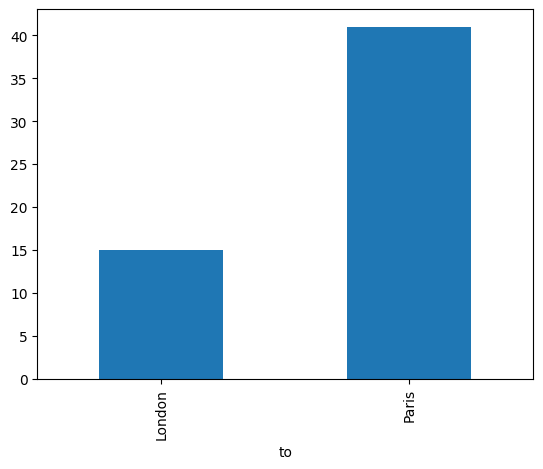

In [9]:
krk_all.query("to == 'London' or to == 'Paris'").groupby("to")["flight"].count().plot.bar()

In [10]:
krk_all.groupby(["airline", "gender"])["flight"].count()

airline     gender
BlueSky     Female    12
            Male      15
PanEurope   Female     7
            Male       8
SunHoliday  Female    27
            Male      31
Name: flight, dtype: int64

<Axes: xlabel='airline,gender'>

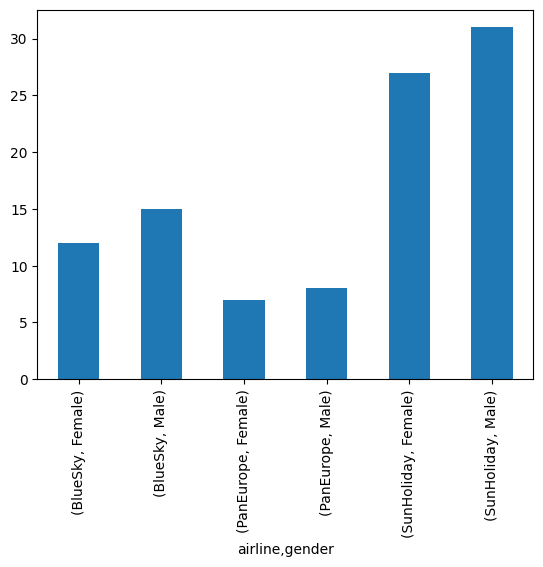

In [14]:
krk_all.groupby(["airline", "gender"])["flight"].count().plot.bar()